Note: The code was mainly set up to register CBCTs to a CT with specific directory formatted names. Here I'm showing a breakdown of how to register any two image files. 

If you are also using the CBCT/CT registration (including replans), then it can all be done automatically. If you're doing say PE to MR to CT etc (i.e. not longitudinal), you'll just have to add another function to process those automatically.

Anywayss, this notebook should show you a breakdown of how to do everything, then how to run it specifically for CBCTs.

In [2]:
import sys

In [3]:
sys.path.append("../code")

In [5]:
from Registration.registration_core import find_registration_file_two_images, register_two_images, find_moving_reference
from sitk_img_tools import save_dicoms, generate_sitk_image

# Registration Between two Images



In [4]:
# Define two image paths
image1_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/462/20181015_CT_05_SEP_2018/'
image2_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/462/20181017_CT_12_OCT_2018/'

Using existing registration file...


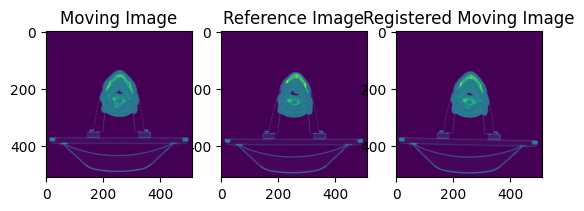

In [5]:
# you can force it to use the optimizer (no reg file) by including param force_uptimizer=True
# You can force it to NEVER use optimizer (even if no reg file) by including allow_optimizer = False

#Returns the path so you know which is the moving image and which is the reference
moving_registered, moving_path = register_two_images(image1_path, image2_path,plot_result=True)


In [6]:
# To see which was moving and which was reference
reference_image_path = image1_path if moving_path == image2_path else image2_path
print("Reference image:",reference_image_path)
print("Moving image:", moving_path)

Reference image: /mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/462/20181017_CT_12_OCT_2018/
Moving image: /mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/462/20181015_CT_05_SEP_2018/


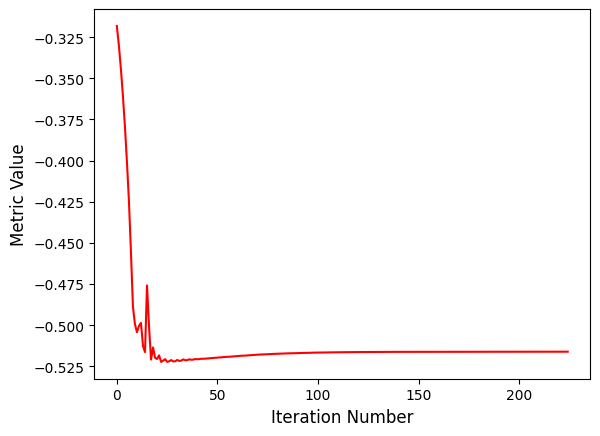

Final metric value: -0.5161302878431836
Optimizer's stopping condition, RegularStepGradientDescentOptimizerv4: Step too small after 225 iterations. Current step (8.30767e-05) is less than minimum step (0.0001).


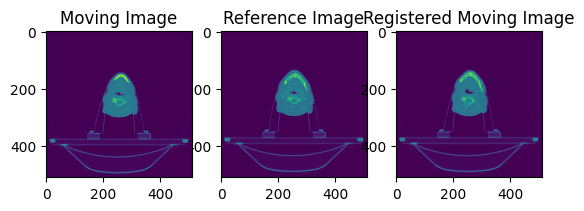

In [11]:
# Forcing optimizer
moving_registered, moving_path = register_two_images(image1_path, image2_path, force_optimizer=True, plot_result=True)

### Saving the registered image

In [12]:
save_path = '/data/kayla/test_dcm_save/'
save_dicoms(moving_path, moving_registered, save_path)

()

In [15]:
# Reload the image

In [17]:
import pydicom as dcm
import os
import matplotlib.pyplot as plt

In [21]:
slices_reg = [dcm.read_file(save_path+ s) for s in os.listdir(save_path) if 'CT' in s]
slices_reg.sort(key = lambda x: (x.InstanceNumber))

slices_original = [dcm.read_file(moving_path+ s) for s in os.listdir(moving_path) if 'CT' in s]
slices_original.sort(key = lambda x: (x.InstanceNumber))

slices_ref = [dcm.read_file(reference_image_path+ s) for s in os.listdir(reference_image_path) if 'CT' in s]
slices_ref.sort(key = lambda x: (x.InstanceNumber))

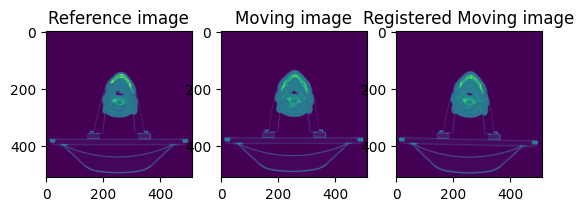

In [26]:
middle_slice = int(len(slices)/2)
plt.subplot(1,3,1)
plt.title("Reference image")
plt.imshow(slices_ref[middle_slice].pixel_array)

plt.subplot(1,3,2)
plt.title("Moving image")
plt.imshow(slices_original[middle_slice].pixel_array)

plt.subplot(1,3,3)
plt.title("Registered Moving image")
plt.imshow(slices_reg[middle_slice].pixel_array)

## Find Moving and REference image given RE file

In [6]:
reg_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/22/20180924_kV_CBCT_1a/RE.1.2.246.352.221.51116297493881708895639323217558014352.dcm'

In [18]:
import pydicom as dcm
import os

import numpy as np

In [21]:
reference, moving = find_moving_reference(reg_path)

In [20]:
print("Refernce Image FrameOfReferenceUID: ", reference)
print("Moving Image FrameOfReferenceUID: ", re

('1.2.246.352.221.492088690143748340117180735030246924977',
 '1.2.246.352.221.473307138696273908916721930082672541838')

NOTE: also have functions for registering single point with or without registration file, eg if you want to reg the isocentre
TO DO: ADD HERE

# Registering longitudinal CBCT data
Note: Needs clean up still. Also will be adding a config file to customize CT and CBCT nomenclature as I've done elsewhere. At the moment, it assumes our standard naming conventions.

In [4]:
from Registration.dicom_registration import register_patient

In [5]:
# Define the patient filepath. This should be where your patient files are housed. 
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/'

In [6]:
# Define the patient (i.e. the folder name) in "PATH" whose images you want to register. 
patient = '462'
patient_path = PATH+ patient+'/'

Replan status:  True False
rows:  2


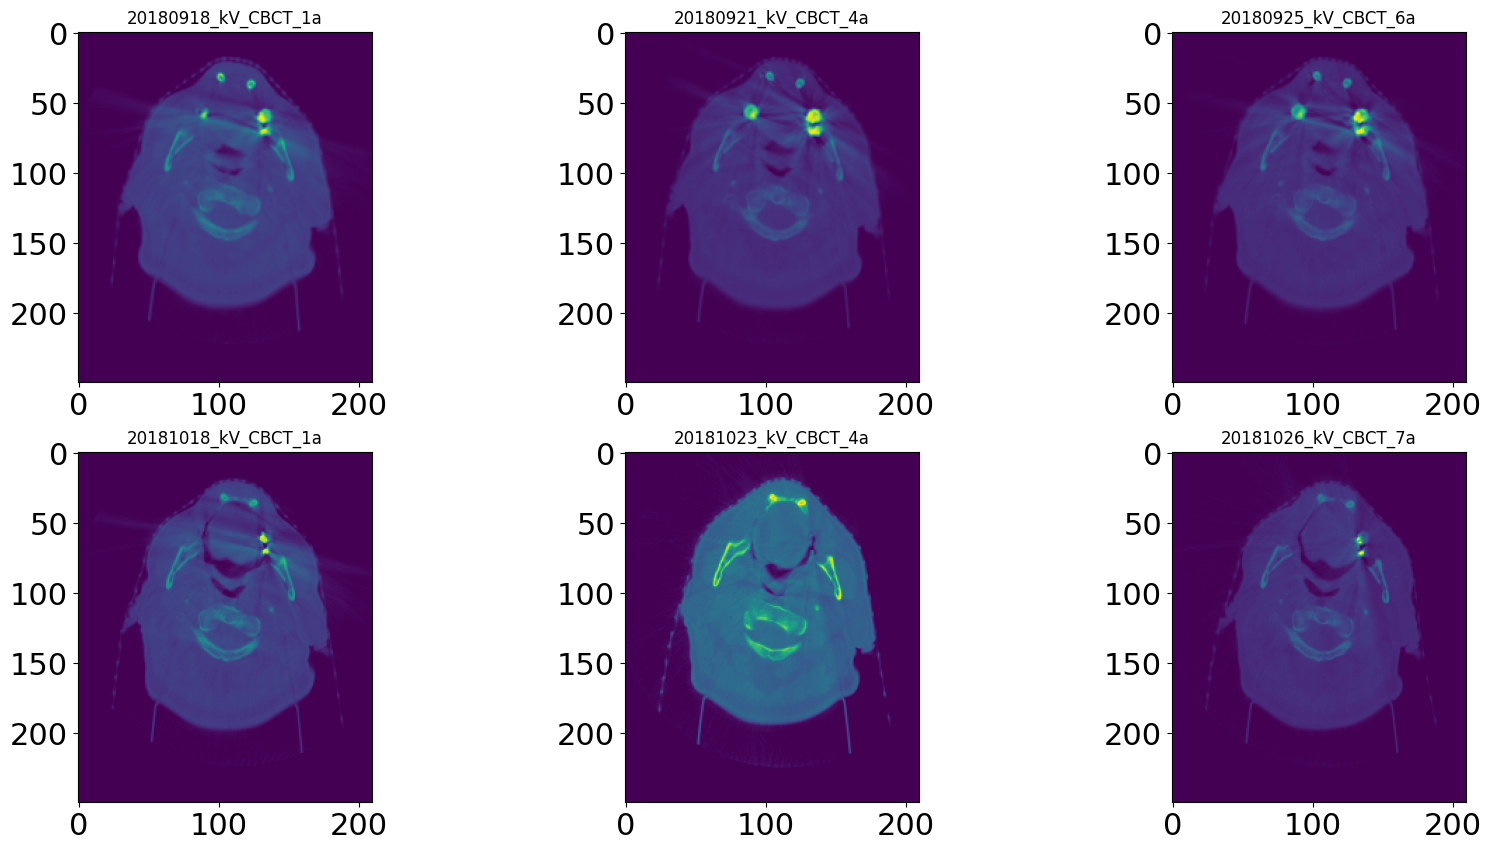

In [8]:
# Register the patient CBCT images
image_dict = register_patient(patient_path, plot=True) #the second parameter is use_reg_file = True, set to false to use the optimizer 


## The resulting image dict contains:
- the origianl CBCTs and the resmapled (registered) CBCTs
- names of the CT files and the CBCT files
- registration matrices used to register the images
- starting position and spacing of the original CT (which should also be the same spacing as the registered CBCTs)
- the isocentre is currently broken

the names of the dict keys are: UID, CBCTs, resampled_CBCTs, isocenters, matrices, starts, isReference




In [31]:
# You can also save the CBCTs by setting save_CBCT=True
# register_patient(patient_path,save_CBCT=True)
'''
# At the moment, change the save file in the dicom_registration.py file
# But i'm changing it to have a config file for easier/better customization
# the config file willl also allow customization of CT and CBCT naming convention
'''

"\n# At the moment, change the save file in the dicom_registration.py file\n# But i'm changing it to have a config file for easier/better customization\n# the config file willl also allow customization of CT and CBCT naming convention\n"